# Homework 2

Name: Amrit Shaw

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import os
# read dir and search for WHITE, DARK and OBJECT (RAW and HDR)
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  


# Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    f.close()
    bands = ''
    for fileline in filelines:
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))   
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    waves = np.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        waves[n] = float(filelines[i].replace(',',''))
        n = n + 1
    
    return samples, bands, lines, waves     

## Task 1

### Colorchecker [scanner]


Grey scale

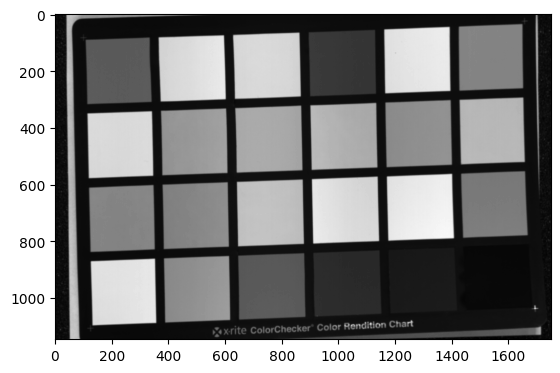

In [54]:
# Get paths
path = "./Colorchecker [scanner]/capture/"
[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)

# Read HDR file
[samples, bands, lines, wavelengths] = read_hdr(object_hdr)

fopen = open(object_raw, "rb")
raw_part = np.fromfile(fopen, dtype=np.uint16) 
spectral_image = np.reshape(raw_part, (lines, bands, samples)) # Reshape 1D to 3D. The order 'lines, bands, samples' for interleave = BIL case

plt.rcParams['figure.dpi'] = 100
plt.imshow(spectral_image[:,105,250:2000], cmap='gray')#, vmin=0,vmas=60500  ## show gray scale slice of 3D spectral image
plt.show()

RGB:

Band 60 wavelength 620.18
Band 46 wavelength 549.71
Band 24 wavelength 440.6


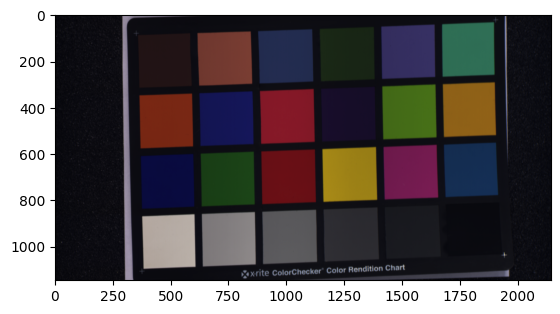

In [55]:
# Generate RGB preview
RGB = np.empty((lines, samples, 3)) 

w1,w2,w3 = 620,550,440
ch_1 = np.abs(np.asarray(wavelengths)-w1).argmin() 
ch_2 = np.abs(np.asarray(wavelengths)-w2).argmin()
ch_3 = np.abs(np.asarray(wavelengths)-w3).argmin()

print('Band',ch_1,'wavelength', wavelengths[ch_1])
print('Band',ch_2,'wavelength', wavelengths[ch_2])
print('Band',ch_3,'wavelength', wavelengths[ch_3])

RGB[:,:,0] = spectral_image[:,ch_1,:] /np.amax(spectral_image[:,ch_1,:]) # we get RGB in range [0,1], normalized
RGB[:,:,1] = spectral_image[:,ch_2,:] /np.amax(spectral_image[:,ch_2,:])
RGB[:,:,2] = spectral_image[:,ch_3,:] /np.amax(spectral_image[:,ch_3,:])

plt.imshow(RGB)
plt.show()

Pair of spectra

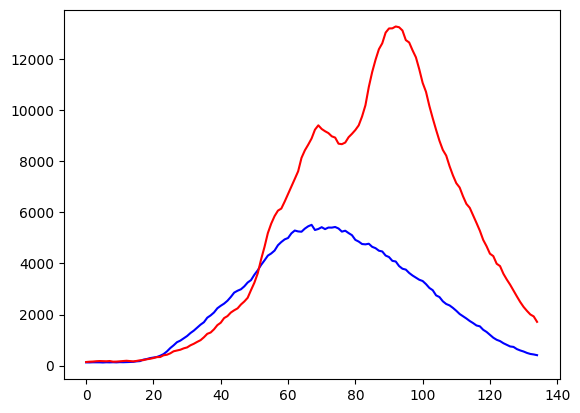

In [56]:
#Show spectra
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.plot(spectral_image[100,:,150], 'b') # show spectrum for pixel spatial pixel 100,150; 'b'= blue color
plt.plot(spectral_image[200,:,400], 'r') # show spectrum for pixel spatial pixel 200,400; 'r'= red color
plt.show()

### Colorchecker 2 lamps [Specim IQ]


gray scale:

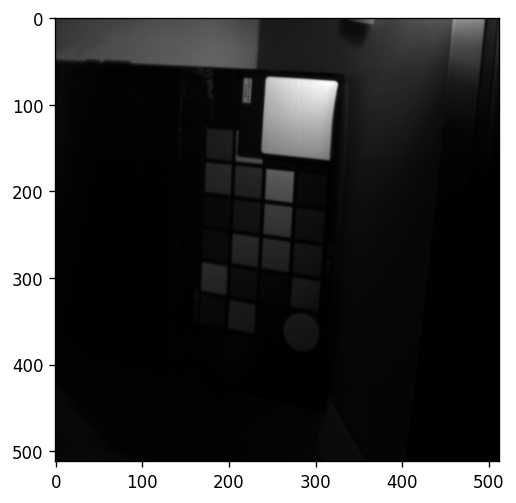

In [59]:
# Get paths
path = "./Colorchecker 2 lamps [Specim IQ]/capture/" 
[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)

# Read HDR file
[samples, bands, lines, wavelengths] = read_hdr(object_hdr)

# Plot grayscale
fopen = open(object_raw, "rb") # Open file to read in Python
raw = np.fromfile(fopen, dtype=np.uint16) #data type 12
fopen.close() # Close opened file

spectral_image = np.reshape(raw, (lines, bands, samples)) # Reshape 1D to 3D. The order 'lines, bands, samples' for interleave = BIL case

plt.rcParams['figure.dpi'] = 120 # Resolution
plt.imshow(spectral_image[:,100,:], cmap='gray')#, vmin=0,vmas=60500  ## show gray scale slice of 3D spectral image
plt.show()


RGB:

Band 86 wavelength 648.95
Band 52 wavelength 548.55
Band 18 wavelength 449.35


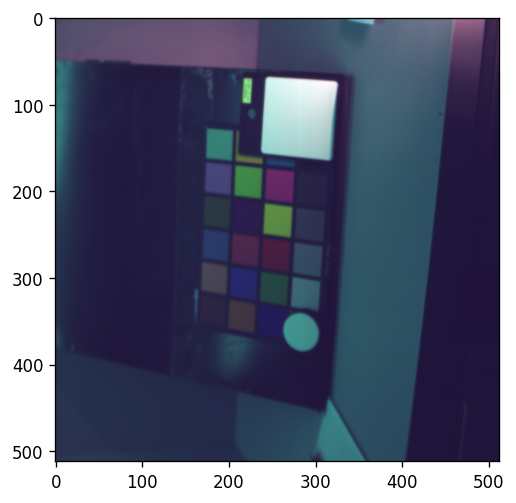

In [60]:
# Generate RGB preview
RGB = np.empty((lines, samples, 3)) 

w1,w2,w3 = 650,550,450
ch_1 = np.abs(np.asarray(wavelengths)-w1).argmin() 
ch_2 = np.abs(np.asarray(wavelengths)-w2).argmin()
ch_3 = np.abs(np.asarray(wavelengths)-w3).argmin()

print('Band',ch_1,'wavelength', wavelengths[ch_1])
print('Band',ch_2,'wavelength', wavelengths[ch_2])
print('Band',ch_3,'wavelength', wavelengths[ch_3])

RGB[:,:,0] = spectral_image[:,ch_1,:] /np.amax(spectral_image[:,ch_1,:]) # we get RGB in range [0,1], normalized
RGB[:,:,1] = spectral_image[:,ch_2,:] /np.amax(spectral_image[:,ch_2,:])
RGB[:,:,2] = spectral_image[:,ch_3,:] /np.amax(spectral_image[:,ch_3,:])

plt.imshow(RGB)
plt.show()


Pair of spectra

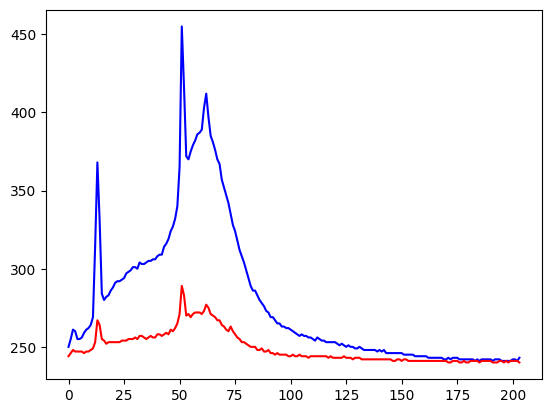

In [62]:
#Show spectra
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.plot(spectral_image[300,:,300], 'b') # show spectrum for pixel spatial pixel 300,300; 'b'= blue color
plt.plot(spectral_image[400,:,420], 'r') # show spectrum for pixel spatial pixel 400,420; 'r'= red color
plt.show()

### Live and palstic leaves [scanner]

gray scale:

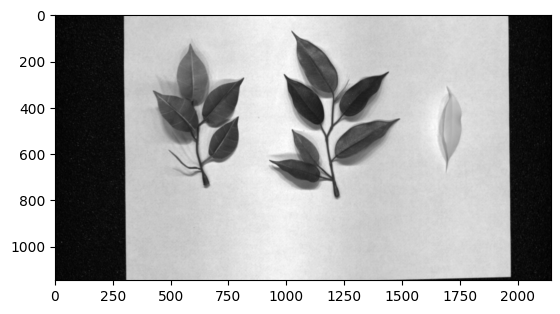

In [63]:
# Get paths
path = "./Live and plastic leaves [scanner]/capture"
[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)

# Read HDR file
[samples, bands, lines, waves] = read_hdr(object_hdr)

# Plot grayscale
fopen = open(object_raw, "rb") # Open file to read in Python
raw_image = np.fromfile(fopen, dtype=np.uint16) #data type 12
fopen.close() # Close opened file

spectral_image = np.reshape(raw_image, (lines, bands, samples)) # Reshape 1D to 3D. The order 'lines, bands, samples' for interleave = BIL case

plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(spectral_image[:,100,:], cmap='gray') 
plt.show()

RGB Preview

Band 76 wavelength 619.3
Band 51 wavelength 545.62
Band 18 wavelength 449.35


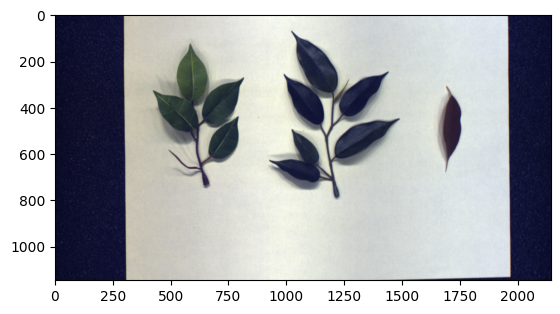

In [64]:

# Generate RGB preview
RGB = np.empty((lines, samples, 3)) 

w1,w2,w3 = 620,545,448
ch_1 = np.abs(np.asarray(wavelengths)-w1).argmin() 
ch_2 = np.abs(np.asarray(wavelengths)-w2).argmin()
ch_3 = np.abs(np.asarray(wavelengths)-w3).argmin()

print('Band',ch_1,'wavelength', wavelengths[ch_1])
print('Band',ch_2,'wavelength', wavelengths[ch_2])
print('Band',ch_3,'wavelength', wavelengths[ch_3])

RGB[:,:,0] = spectral_image[:,ch_1,:] /np.amax(spectral_image[:,ch_1,:]) # we get RGB in range [0,1], normalized
RGB[:,:,1] = spectral_image[:,ch_2,:] /np.amax(spectral_image[:,ch_2,:])
RGB[:,:,2] = spectral_image[:,ch_3,:] /np.amax(spectral_image[:,ch_3,:])
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB)
plt.show()


Pair of spectra


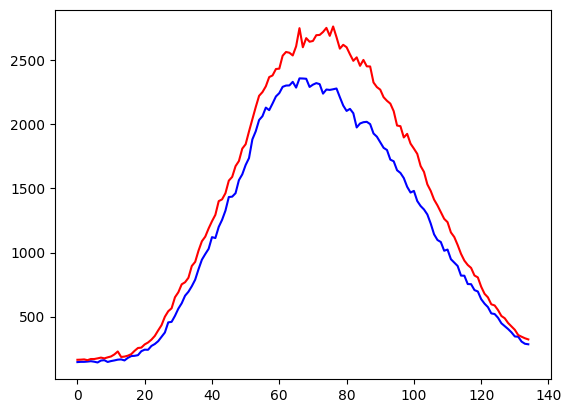

In [11]:
#Show spectra
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.plot(spectral_image[250,:,100], 'b') # show spectrum for pixel spatial pixel 250,100; 'b'= blue color
plt.plot(spectral_image[150,:,220], 'r') # show spectrum for pixel spatial pixel 150,220; 'r'= red color
plt.show()

## Task 2

bands =  151


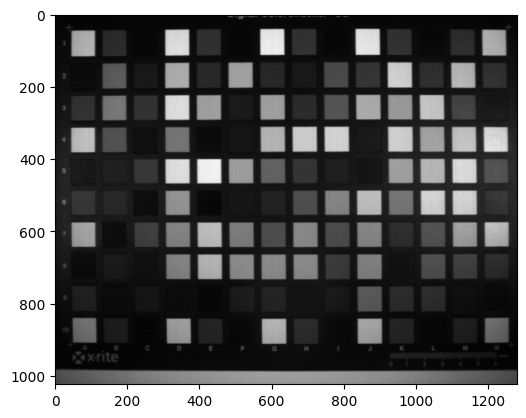

In [14]:
open_path = "./Camera from Japan/colorChecker.nh7"
# Read raw
samples = 1280
lines = 1024
f = open(open_path, "r")
raw_image = np.fromfile(f, dtype=np.uint16) 
f.close()


bands = int(len(raw_image)/(samples*lines))

print('bands = ', bands)


spectral_image = np.reshape(raw_image, (lines, bands, samples))

plt.imshow(spectral_image[:,60,:], cmap="gray")
plt.show()


## Task 3

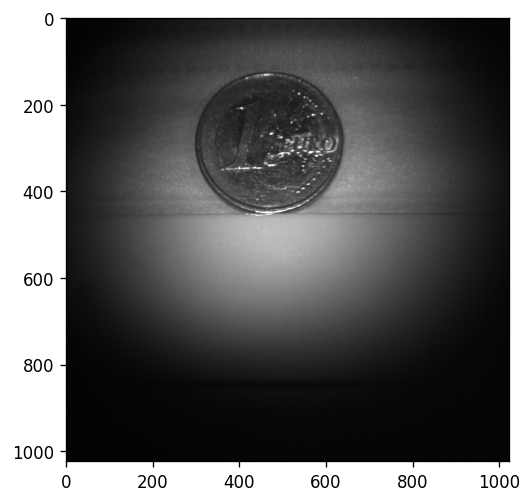

In [65]:
path = "./Image of coin (Senop camera)/HSI_snapshot__20212101144836.dat"

hdr_path = "./Image of coin (Senop camera)/HSI_snapshot__20212101144836.hdr"

# getting samples, bands and lines
f=open(hdr_path, "r")
filelines = f.readlines()
f.close()
bands = ''
for fileline in filelines:
   if 'samples' in fileline.lower():
      samples = int(fileline.replace('samples = ',''))
   if bands =='' and 'bands' in fileline.lower():
      bands = int(fileline.replace('bands = ',''))
   if 'lines' in fileline.lower():
      lines = int(fileline.replace('lines = ',''))   


# Open the file
f = open(path, "rb")
raw_image = np.fromfile(f, dtype='>u2')
f.close()

spectral_image = np.reshape(raw_image, (bands, samples , lines))

plt.rcParams['figure.dpi'] = 120
plt.imshow(spectral_image[3,:,:], cmap="gray")
plt.show()

## Task 4

Read the Colorchecker 121ms `raw` and `hdr` files. Plot grayscale to verify the image.

Samples  512
Bands  204
Lines  512


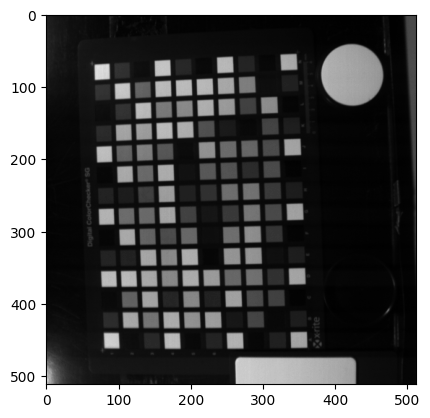

In [19]:
# Get paths
path = "./Colorchecker 121 ms (for Freelook demo)-20221028T054325Z-001/Colorchecker 121 ms (for Freelook demo)/capture"
[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)

# Read HDR file
[samples, bands, lines, wavelengths] = read_hdr(object_hdr)

# Print info
print('Samples ',samples)
print('Bands ', bands)
print('Lines ', lines)

# Plot grayscale
f = open(object_raw, "r") # Open file to read in Python
raw = np.fromfile(f, dtype=np.uint16) 
f.close() # Close opened file

spectral_image = np.reshape(raw, (lines, bands, samples)) # Reshape 1D to 3D. The order 'lines, bands, samples' for interleave = BIL case

plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(spectral_image[:,150,:], cmap='gray') # show gray scale slice of 3D spectral image
plt.show()

The current format is `interleave=BIL` and we need to save it as `BIP` by rotating the spectral cube.

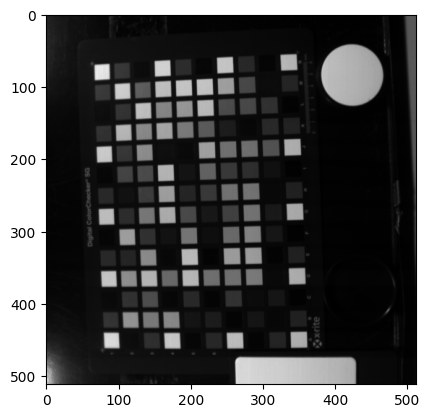

(512, 512, 204)


In [51]:
# Rotate
bip = np.rot90(spectral_image, k=1, axes=(2, 1))
# Save to file
bip.tofile('colorchecker_BIPformat.raw')

# Plot
plt.rcParams['figure.dpi'] = 100 # Resolution
plt.imshow(bip[:,:,100], cmap='gray') # show gray scale slice of 3D spectral image
plt.show()
print(bip.shape)

The file created was opened using Freelook.

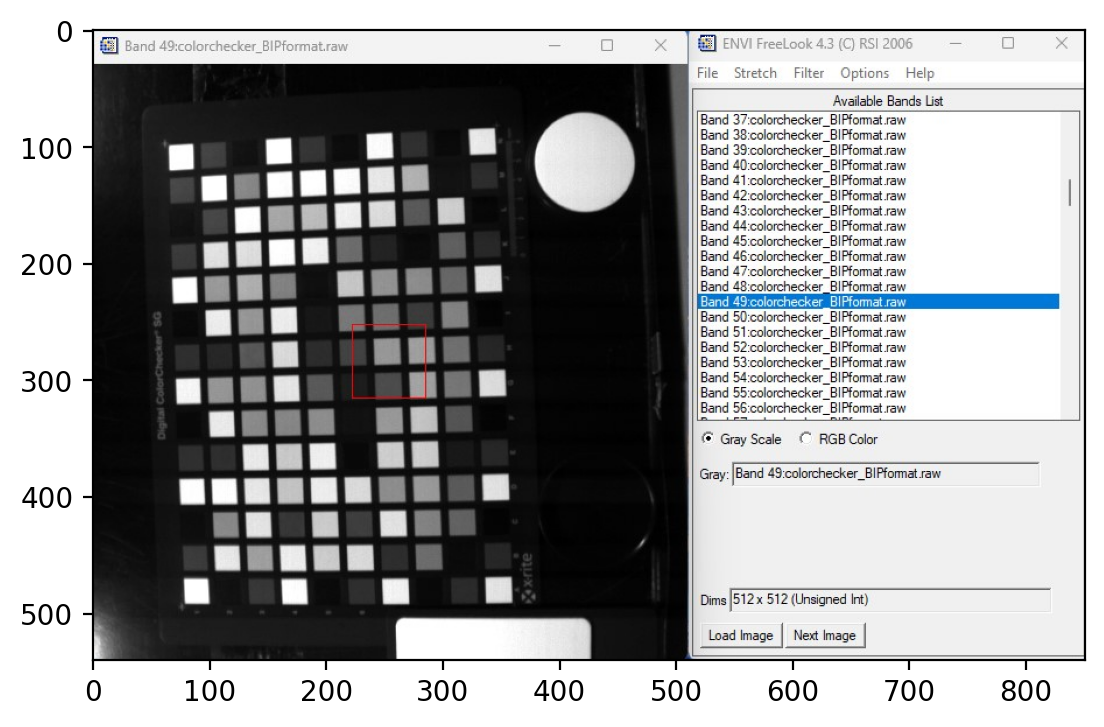

In [52]:
from PIL import Image

im = Image.open('Colorchecker_BIPformat_freelook.jpg')
plt.rcParams['figure.dpi'] = 200   
plt.imshow(im)

![](cc_121ms_freelook.png "Colorchecker 121ms opened in Freelook")